# **AIRLINK STOCK PREDICTION FROM 2025 TO 2027 (PSX)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv("/content/psx_data_20211210_to_20241210.csv")
df.head()

,Date,Symbol,Open,High,Low,Close
0,2021-12-01,WTL,2.12,2.22,2.12,2.19
1,2021-12-01,WTL,2.12,2.22,2.12,2.19
2,2021-12-02,WTL,2.25,2.25,1.95,2.01
3,2021-12-02,WTL,2.25,2.25,1.95,2.01
4,2021-12-03,WTL,2.01,2.14,1.95,2.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49820 entries, 0 to 49819
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    49820 non-null  object 
 1   Symbol  49820 non-null  object 
 2   Open    49820 non-null  float64
 3   High    49820 non-null  float64
 4   Low     49820 non-null  float64
 5   Close   49820 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
print(f'Total number of rows:{df.shape[0]} and Total number of colums:{df.shape[1]}')

Total number of rows:49820 and Total number of colums:6


In [ ]:
print(f'Total number of null values in each columns')
df.isnull().sum()

Total number of null values in each columns


,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0


In [ ]:
print(f'statistical information of the dataset')
df.describe()

statistical information of the dataset


,Open,High,Low,Close
count,49820.000000,49820.000000,49820.000000,49820.000000
mean,38.937193,39.631940,38.263455,40.302899
std,48.731898,49.585236,47.894553,48.916828
min,0.000000,0.000000,0.000000,0.800000
25%,6.490000,6.660000,6.330000,7.030000
50%,16.240000,16.600000,15.965000,17.340000
75%,59.917500,60.982500,58.500000,62.475000
max,429.950000,443.900000,422.000000,426.110000


In [ ]:
#Filtering out airlink dataset
airlink=df[df['Symbol']=="AIRLINK"]
airlink=df.sort_values(by='Date')
airlink

,Date,Symbol,Open,High,Low,Close
0,2021-12-01,WTL,2.12,2.22,2.12,2.19
27816,2021-12-01,NETSOL,102.00,104.70,102.00,102.86
27815,2021-12-01,NETSOL,102.00,104.70,102.00,102.86
6136,2021-12-01,WTL-JAN,0.00,0.00,0.00,2.24
6137,2021-12-01,WTL-JAN,0.00,0.00,0.00,2.24
...,...,...,...,...,...,...
18967,2024-11-29,TRG,60.77,61.55,59.01,59.27
18007,2024-11-29,PTC,19.50,20.90,19.36,20.34
17047,2024-11-29,OGDC,194.00,197.75,190.75,195.25
22584,2024-11-29,FFC,326.00,330.00,321.20,324.89


In [ ]:
#converting the data column to datetime formate allow time based operation like indexing
airlink['Date']=pd.to_datetime(airlink['Date'])
airlink['Date']

,Date
0,2021-12-01
27816,2021-12-01
27815,2021-12-01
6136,2021-12-01
6137,2021-12-01
...,...
18967,2024-11-29
18007,2024-11-29
17047,2024-11-29
22584,2024-11-29


In [ ]:
print("The datatype of Date got changed from object: ")
airlink.dtypes

The datatype of Date got changed from object: 


,0
Date,datetime64[ns]
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64


In [ ]:
#Add new column
airlink['days']=(airlink['Date']-airlink['Date'].min()).dt.days
airlink

,Date,Symbol,Open,High,Low,Close,days
0,2021-12-01,WTL,2.12,2.22,2.12,2.19,0
27816,2021-12-01,NETSOL,102.00,104.70,102.00,102.86,0
27815,2021-12-01,NETSOL,102.00,104.70,102.00,102.86,0
6136,2021-12-01,WTL-JAN,0.00,0.00,0.00,2.24,0
6137,2021-12-01,WTL-JAN,0.00,0.00,0.00,2.24,0
...,...,...,...,...,...,...,...
18967,2024-11-29,TRG,60.77,61.55,59.01,59.27,1094
18007,2024-11-29,PTC,19.50,20.90,19.36,20.34,1094
17047,2024-11-29,OGDC,194.00,197.75,190.75,195.25,1094
22584,2024-11-29,FFC,326.00,330.00,321.20,324.89,1094


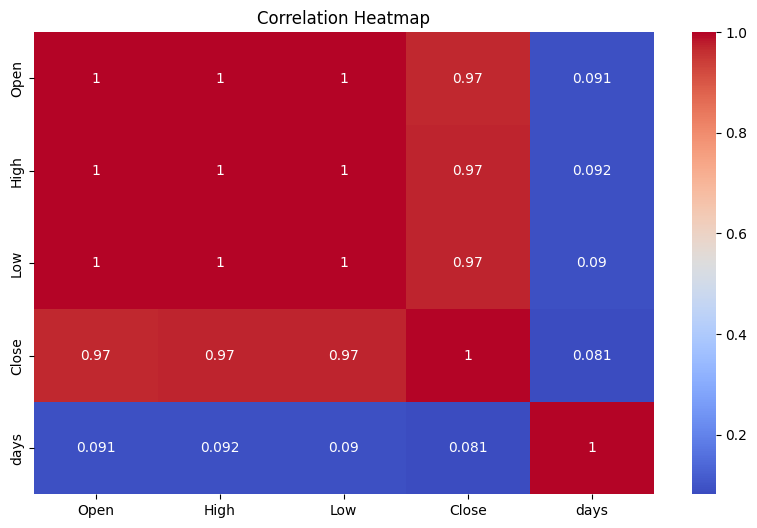

In [ ]:
#creating a heatmap correlation
numeric_df = airlink.select_dtypes(include='number')

#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Feature selection
X = airlink[['Open','days']]
y = airlink[['Close']]

In [ ]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)


In [ ]:
# Evaluation of the model's performance

mse = mean_squared_error(y_test,y_predict)
r_2_score = r2_score(y_test,y_predict)

print(f'Mean squared error = {mse}.\nr2 Score = {r_2_score}.')


Mean squared error = 135.35623599643938.
r2 Score = 0.9439811707904345.


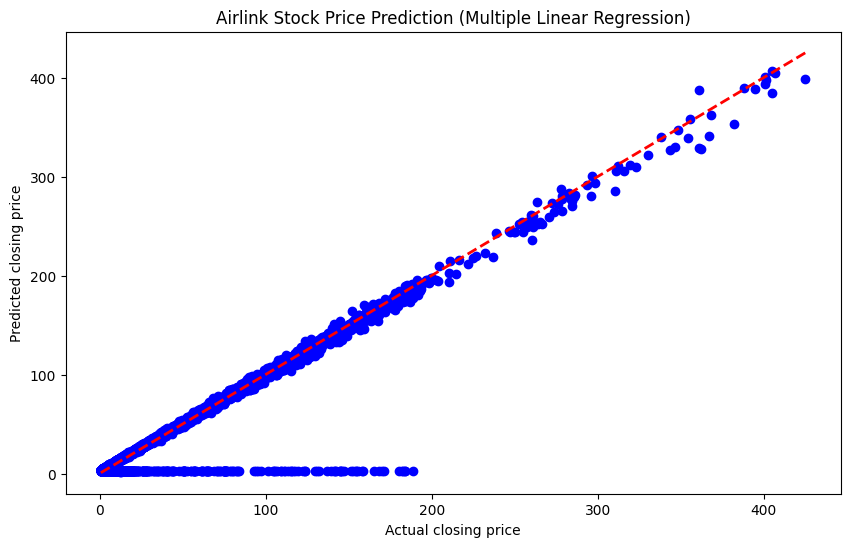

In [ ]:
# Scatter plot Actual vs predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict, color='blue', label='Acual Vs predicted')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--', lw=2, label='Ideal Line')
plt.title("Airlink Stock Price Prediction (Multiple Linear Regression)")
plt.xlabel('Actual closing price')
plt.ylabel("Predicted closing price")
plt.show()

In [ ]:
# Prediction for the next three years
from datetime import timedelta

last_date = airlink['Date'].max()
future_date = pd.date_range(start=last_date + timedelta(days=1), periods=3*365, freq='D')

In [ ]:
# Calculating number of days

start_date = airlink['Date'].min()
future_days = (future_date-start_date).days

In [ ]:
last_open = airlink.iloc[-1,2]
future_open = [last_open] * len(future_days)

In [ ]:
future_df = pd.DataFrame({
     'Open': future_open,
    'days': future_days
  })

In [ ]:
future_df

,Open,Days
0,41.0,1095
1,41.0,1096
2,41.0,1097
3,41.0,1098
4,41.0,1099
...,...,...
1090,41.0,2185
1091,41.0,2186
1092,41.0,2187
1093,41.0,2188


In [ ]:
future_prediction = lr.predict(future_df)
future_prediction = future_prediction.flatten()

In [ ]:
predicted_df = pd.DataFrame({
    'Date':future_date,
    'Predicted Closing Price': future_prediction
})

predicted_df

,Date,Predicted Closing Price
0,2024-11-30,41.755261
1,2024-12-01,41.754320
2,2024-12-02,41.753379
3,2024-12-03,41.752438
4,2024-12-04,41.751497
...,...,...
1090,2027-11-25,40.729683
1091,2027-11-26,40.728743
1092,2027-11-27,40.727802
1093,2027-11-28,40.726861


In [ ]:
predicted_df.to_csv("Airlink stock price prediction.csv",index=False)

In [ ]:
from google.colab import files
files.download('Airlink stock price prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>